In [1]:
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.keras.layers import Dense,Dropout ,Flatten , Conv2D , MaxPooling2D


In [3]:
import numpy as np

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train , y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [6]:
print('Shape of training data',x_train.shape)

Shape of training data (60000, 28, 28)


In [7]:
print('Shape of testing data',x_test.shape)

Shape of testing data (10000, 28, 28)


In [8]:
print('Number of training Samples',x_train.shape[0])

Number of training Samples 60000


In [9]:
print('Number of testing Samples',x_test.shape[0])

Number of testing Samples 10000


In [10]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [11]:
from tensorflow.keras  import utils

In [12]:
y_train = utils.to_categorical(y_train,10)
y_test = utils.to_categorical(y_test,10)

In [25]:
arr = y_train[500]
print(arr)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [26]:
label = np.argmax(arr)
print(label)

3


In [27]:
import matplotlib.pyplot as plt

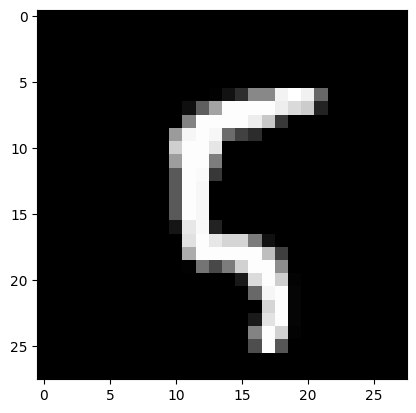

In [28]:
plt.imshow(x_train[100],cmap='gray')
plt.show()

In [31]:
model = Sequential()
import warnings
warnings.filterwarnings('ignore')

In [32]:
input_layer = Dense(32,input_shape=(28,28,1))
model.add(input_layer)

In [33]:
conv_layer1 = Conv2D(32,kernel_size=(3,3),activation='relu')
model.add(conv_layer1)

In [34]:
conv_layer2 = Conv2D(64,(3,3),activation='relu')
model.add(conv_layer2)

In [35]:
pool_layer = MaxPooling2D(pool_size=(2,2))
model.add(pool_layer)

In [36]:
drop_layer = Dropout(0.5)
model.add(drop_layer)

In [37]:
flat_layer = Flatten()
model.add(flat_layer)

In [38]:
output_layer = Dense(10,activation='softmax')
model.add(output_layer)

In [39]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
history = model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.8741 - loss: 1.0857 - val_accuracy: 0.9700 - val_loss: 0.1005
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9649 - loss: 0.1136 - val_accuracy: 0.9785 - val_loss: 0.0645
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9737 - loss: 0.0860 - val_accuracy: 0.9839 - val_loss: 0.0552
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9801 - loss: 0.0643 - val_accuracy: 0.9853 - val_loss: 0.0481
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9827 - loss: 0.0541 - val_accuracy: 0.9871 - val_loss: 0.0407
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9874 - loss: 0.0412 - val_accuracy: 0.9869 - val_loss: 0.0419
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9876 - loss: 0.0394 - val_accuracy: 0.9855 - val_loss: 0.0493
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9893 -

In [41]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss)
print(val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9849 - loss: 0.0451
0.038107212632894516
0.9879000186920166


In [43]:
arr = model.predict([x_train[500].reshape(1,28,28,1)])
print(arr)
label = np.argmax(arr)
print(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
[[7.5439470e-06 3.3667334e-06 3.9406279e-01 6.0175061e-01 3.9237139e-07
  5.4506859e-07 3.1273530e-09 4.0907115e-03 7.6881435e-05 7.1545192e-06]]
3
